## Introduction -

### Intent of application:
The intent of this application is to conduct an exploratory data analysis - using classification techniques - of the UCI Mushroom dataset. Within this application we will be generating graphs to visualize and compare the different attributes within the dataset with the aim to develop a mushroom stew that is visually appealing, pleasant smelling, and non-toxic.

### Dataset to be used, including source:
We will be using the UCI Mushroom Dataset, made available through the UCI machine learning database repository, for this exploration and analysis. “The mushroom dataset was donated to the University of California Irvine Machine Learning Repository in 1987.” 

(https://www.kaggle.com/code/aavigan/uci-mushroom-data/notebook) 

This dataset consists of 8124 hypothetical samples which correspond to 23 species of gilled mushrooms in the Agaricus and Lepiota genera. The samples are constructed from The Audubon Society Field Guide to North American Mushrooms (1981). The samples are labeled as either 'e' or 'p' for edible or poisonous. Mushrooms which were of dubious or unknown edibility were incorporated as poisonous.” 

(https://www.kaggle.com/code/aavigan/uci-mushroom-data/notebook) 

### Use case:
A chef is aiming to feature a new stew on the seasonal menu for their local restaurant. This chef will be featuring a mushroom stew that is visually appealing, pleasant smelling, and most importantly non-toxic!

## Dataset Analysis -

### Define variables:
The dataset contains 22 predictor attributes for 8124 entries. The predictor variables correspond to information regarding physical, visual, and olfactory features of each specimen as well as habitat and growth pattern information. 
(https://www.kaggle.com/code/aavigan/uci-mushroom-data/notebook)

Attribute Information:	
+ Cap-shape: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s
+ Cap-surface: fibrous=f, grooves=g, scaly=y, smooth=s
+ Cap-color: brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y
+ Bruises?: bruises=t, no=f
+ Odor: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s
+ Gill-attachment: attached=a, descending=d, free=f, notched=n
+ Gill-spacing: close=c, crowded=w, distant=d
+ Gill-size: broad=b, narrow=n
+ Gill-color: black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y
+ Stalk-shape: enlarging=e, tapering=t
+ Stalk-root: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=?
+ Stalk-surface-above-ring: fibrous=f, scaly=y, silky=k, smooth=s
+ Stalk-surface-below-ring: fibrous=f, scaly=y, silky=k, smooth=s
+ Stalk-color-above-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y
+ Stalk-color-below-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y
+ Veil-type: partial=p, universal=u
+ Veil-color: brown=n, orange=o, white=w, yellow=y
+ Ring-number: none=n, one=o, two=t
+ Ring-type: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z
+ Spore-print-color: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y
+ Population: abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y
+ Habitat: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d

### Define labels:
The UCI Mushroom dataset uses the label of **species** which is the target to be predicted based on the values listed for the attributes above, samples will be classified into one of 23 **species** based on the corresponding information entered regarding physical, visual and olfactory features, habitat, and growth patterns. 

## Inputs -

### Library installation through pip:

In [9]:
%%capture
! pip install numpy

In [10]:
%%capture
! pip install scipy

In [11]:
%%capture
! pip install sklearn

In [12]:
%%capture
! pip install scikit-learn

In [13]:
%%capture
! pip install pandas_profiling

In [14]:
%%capture
! pip install graphviz

### Data import:
We will be accessing the UCI Mushroom dataset through the UC Irvine Machine Learning Dataset Repository. In order to load the UCI Mushroom dataset for this analysis we will be running the following code block resulting in a dataframe:

In [15]:
import pandas as pd

url_file = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"

mushrooms_df = pd.read_csv(url_file)

mushrooms_df.head()

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


In [16]:
# renaming the DF columns
cols = ['Toxicity','Cap Shape','Cap Surface', 'Cap Color', 'Bruises', 'Odor', 'Gill Attachment', 'Gill Spacing', 'Gill Size', 'Gill Color', 'Stalk Shape', 'Stalk Root', 'Stalk Surface Above Ring', 'Stalk Surface Below Ring', 'Stalk Color Above Ring', 'Stalk Color Below Ring', 'Veil Type', 'Veil Color', 'Ring Number', 'Ring Type', 'Spore Print Color', 'Population', 'Habitat']
mushrooms_df.columns = cols
print(mushrooms_df.columns)

Index(['Toxicity', 'Cap Shape', 'Cap Surface', 'Cap Color', 'Bruises', 'Odor',
       'Gill Attachment', 'Gill Spacing', 'Gill Size', 'Gill Color',
       'Stalk Shape', 'Stalk Root', 'Stalk Surface Above Ring',
       'Stalk Surface Below Ring', 'Stalk Color Above Ring',
       'Stalk Color Below Ring', 'Veil Type', 'Veil Color', 'Ring Number',
       'Ring Type', 'Spore Print Color', 'Population', 'Habitat'],
      dtype='object')


In [17]:
# removing missing values
mushrooms_df = mushrooms_df[mushrooms_df['Stalk Root'] != '?']

## Proposed Libraries -

### Libraries:
The libraries we are proposing to conduct this exploratory analysis are Scikit-learn, Pandas-profiling, Numpy, Matplotlib, and Pandas. 

### Library source:
#### Scikit-learn
+ https://scikit-learn.org/stable/
+ Scikit-learn is an open source Python library that has powerful tools for data analysis and data mining.

#### Pandas-profiling
+ https://github.com/ydataai/pandas-profiling
+ Pandas-profiling is an open source library that can generate beautiful interactive reports for any dataset.

#### Numpy
+ https://numpy.org/
+ NumPy is a Python library used for working with arrays. It also has functions for working in domain of linear algebra, fourier transform, and matrices.

#### Matplotlib
+ https://matplotlib.org/
+ Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib makes easy things easy and hard things possible.
    - Create publication quality plots.
    - Make interactive figures that can zoom, pan, update.
    - Customize visual style and layout.
    - Export to many file formats.
    - Embed in JupyterLab and Graphical User Interfaces.
    - Use a rich array of third-party packages built on Matplotlib.

#### Seaborn
+ https://seaborn.pydata.org/
+ Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

#### Pandas
+ https://pandas.pydata.org/
+ Pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language.

### Import Libraries:

In [18]:
from pandas_profiling import ProfileReport
import numpy as np
import matplotlib.pyplot as plt
import graphviz
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler 
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.manifold import TSNE
from sklearn import preprocessing
from sklearn import svm, datasets, metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit
#from sklearn.cluster import KMeans
#from sklearn import metrics
#from sklearn.linear_model import Lasso
#from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold


## Proposed Solution -

### Functional description:
Our functional solution will explore the UCI Mushroom dataset from the UCI machine learning repository using tools and libraries available in Python including scikit-learn, pandas-profiling. The solution will explore the relationship between the attributes and label (species) of the dataset to understand the given data and try to find out features, insights and anomalies from the data using statistics and graphical representation for optimal classification. We will perform exploratory analysis to extract meaningful insight from the data and identify the best features to be used for accurately predicting the target class for each case in the data. The insights we gain will allow us to identify the best species for inclusion in our stew based on the data relationships and classification outcomes. 

## Proposed Outputs -

### Define application outputs

The solution will provide the following visualizations:

1. A pandas dataframe of UCI Mushroom dataset which will be used to run EDA, classification techniques, and visualizations.
2. Exploratory Data Analysis using Pandas Profiling.
3. Classification techniques to include the following: 
    1. Logistic Regression - Logistic regression is used to find the probability of event outcomes, either Success or Failure. Logistic regression is most often used when the dependent (target) variable is binary (0/ 1, True/ False, Yes/ No) in nature (a classification problem), considering the nature of this dataset using logistic regression is an appropriate option for analyzing this dataset. 
    1. Naïve Bayes - Naive Bayes is an algorithm based on the Bayesian theorem that is successfully applied to classification problems. This is a comparatively fast and accurate classification model that addresses the relationship between probability and possibility. To apply this model, every pair of attributes must be independent of every other pairing. 
    1. K-Nearest Neighbors - K-Nearest Neighbors is a simple classification algorithm in which K refers to the square root of the number of records (most commonly “training” records). As stated above, this is a simple algorithm, but it is important within the discipline of machine learning. Applications of which include data mining, intrusion detection, and real-life scenarios where non-parametric algorithms are required. 
    1. Support Vector Machine - Support Vector Machine is a model applied to datasets for classification purposes. This algorithm also analyzes datasets for regression analysis. This dataset will apply the classification approach to determine the species of the mushroom based on the attributes. For our assignment purposes we may discover trends within or amongst species as it pertains to color, taste, smell, toxicity, etc. These trends, based on species, may allow us to more readily determine mushrooms to include in or exclude from our stew recipe.
    1. Linear Discriminant Analysis - Linear Discriminant Analysis estimates the probability of classification into each class given a net new set of (data point) inputs. For our purposes this algorithm will provide an interesting insight into the dataset and any present class trends. But, it may not prove crucial to complete the assignment at hand (beyond a classification probability exploration).
    1. Decision Tree - A decision tree is used when we want to identify a class for (or classify) data points (values) as a node or branch within a tree. Within this dataset, we are targeting the species of the mushroom based on the values for each attribute. 
    1. Random Forest - Random Forest is a method used for classification and regression (output specific) that uses decision trees. With random forest, we will be able to explore the relationship (and trends) between the attributes and the given values and the species node/branch. This may inform us of species that lean towards a specific taste, smell, color, etc. which we can then explore further for confirmation.
    1. Stochastic Gradient Descent Algorithm - Stochastic Gradient Descent is an algorithm that learns linear classifiers under the convex loss function. 



## Proposed Visualization -

### 1. A pandas dataframe of Mushroom dataset which will be used to run EDA, regression techniques, and visualizations

In [19]:
import pandas as pd
df = pd.DataFrame(data = mushrooms_df, columns = mushrooms_df.columns)
df.head()

,Toxicity,Cap Shape,Cap Surface,Cap Color,Bruises,Odor,Gill Attachment,Gill Spacing,Gill Size,Gill Color,...,Stalk Surface Below Ring,Stalk Color Above Ring,Stalk Color Below Ring,Veil Type,Veil Color,Ring Number,Ring Type,Spore Print Color,Population,Habitat
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


### Define visualization of outputs:
For exploratory data analysis, we will produce a variety of visualizations including Pandas-profiling. This includes line plots, ribbon plots, bar plots, whisker plots, among others. For a series of classification techniques, we will utilize a scatter plot (including a decision boundary) to plot the species versus the attributes in a logistic regression to see the shape of the species distribution. To visualize the results of our application of classification techniques, we will build a simple decision tree model and apply random forest based on toxicity as the root node. Furthermore, coefficient tables will analyze the accuracy of each model or algorithm.

### 2. Exploratory Data Analysis using Pandas Profiling

In [20]:
profile = ProfileReport(df)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Exploratory data analysis with pandas-profiling allows us to get a general feel for patterns in the data: normality, individual components, the variance and visually inspect for outlying points.

### 3. Classification techniques to include the following: 

#### A. Logistic Regression

Logistic regression is used to find the probability of event outcomes, either Success or Failure. Logistic regression is most often used when the dependent (target) variable is binary (0/ 1, True/ False, Yes/ No) in nature (a classification problem), considering the nature of this dataset using logistic regression is an appropriate option for analyzing this dataset. 

In [21]:
df.describe()

,Toxicity,Cap Shape,Cap Surface,Cap Color,Bruises,Odor,Gill Attachment,Gill Spacing,Gill Size,Gill Color,...,Stalk Surface Below Ring,Stalk Color Above Ring,Stalk Color Below Ring,Veil Type,Veil Color,Ring Number,Ring Type,Spore Print Color,Population,Habitat
count,5643,5643,5643,5643,5643,5643,5643,5643,5643,5643,...,5643,5643,5643,5643,5643,5643,5643,5643,5643,5643
unique,2,6,4,8,2,7,2,2,2,9,...,4,7,7,1,2,3,4,6,6,6
top,e,x,y,g,t,n,f,c,b,p,...,s,w,w,p,w,o,p,n,v,d
freq,3488,2839,2220,1696,3183,2776,5625,4619,4940,1384,...,3543,3135,3087,5643,5635,5487,3487,1920,2160,2492


Accuracy: 98.56%


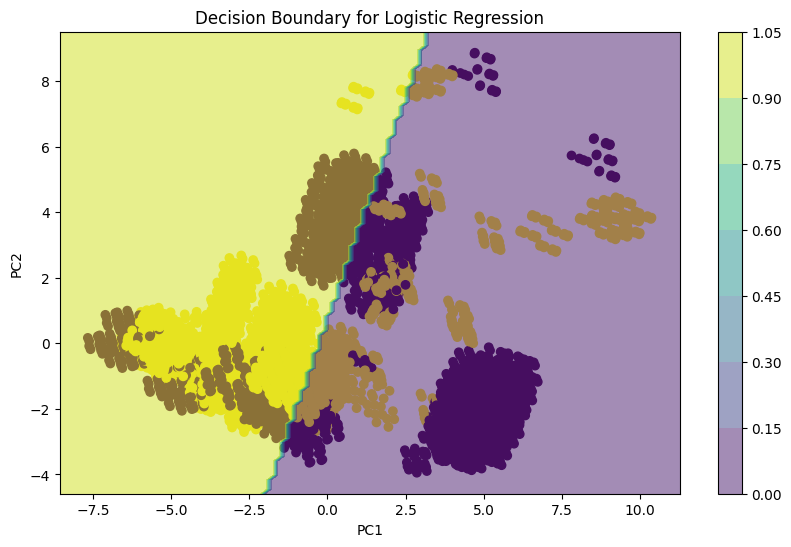

In [33]:
%matplotlib inline

import pandas as pd
import urllib.request as urllib
import io
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

warnings.filterwarnings("ignore")

# Download the mushroom dataset from the UCI Machine Learning Repository
url_file = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
response = urllib.urlopen(url_file)

# Convert the CSV data to a pandas DataFrame
mushrooms_df = pd.read_csv(io.StringIO(response.read().decode("utf-8")), header=None)

# Create a new DataFrame with column names
columns = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises?', 'odor', 'gill-attachment', 
           'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 
           'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 
           'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']

df = pd.DataFrame(data=mushrooms_df.values, columns=columns)

# Convert categorical data to numerical data
for column in df.columns:
    df[column] = pd.factorize(df[column])[0]

# Fit a logistic regression model on the entire dataset
X = df.drop("class", axis=1)
y = df["class"]
lr = LogisticRegression(solver="lbfgs", max_iter=500)
lr.fit(X, y)

# Print the accuracy score
print("Accuracy: {}%".format(round(lr.score(X, y)*100,2)))

# Perform PCA on the dataset and use the first two principal components for plotting
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the decision boundary
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 100)
yy = np.linspace(ylim[0], ylim[1], 100)
XX, YY = np.meshgrid(xx, yy)
Z = lr.predict(pca.inverse_transform(np.column_stack([XX.ravel(), YY.ravel()])))
Z = Z.reshape(XX.shape)
cs = ax.contourf(XX, YY, Z, alpha=0.5, cmap='viridis')
plt.colorbar(cs)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Decision Boundary for Logistic Regression')
plt.show()


The Logistic Regression test accuracy is 98.56. The output of this code created a visualization scatter plot of the first two features of the dataset colored by their class (poisonous or edible), and overlays the decision boundary learned by the logistic regression model. The decision boundary is the line where the probability of the positive class (poisonous) is 0.5, and it separates the two classes in the feature space.

#### B. Naive Bayes

Naive Bayes is an algorithm based on the Bayesian theorem that is successfully applied to classification problems. This is a comparatively fast and accurate classification model that addresses the relationship between probability and possibility. To apply this model, every pair of attributes must be independent of every other pairing. 

Accuracy score on entire dataset: 0.9260216642048252


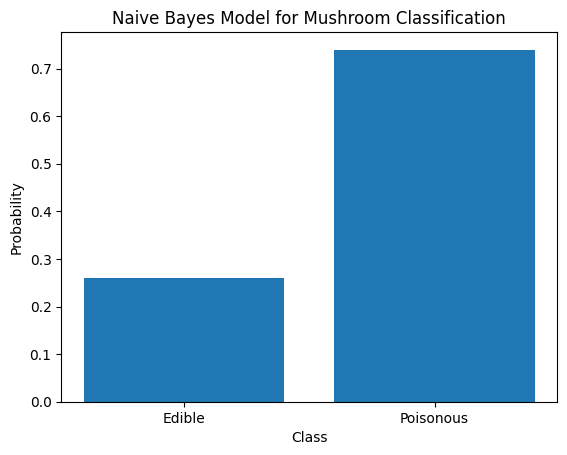

In [35]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB

# Copying the dataframe to apply this classfication technique
naive_df = df.copy(deep=True)

# Download the mushroom dataset from the UCI Machine Learning Repository
url_file = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
mushrooms_df = pd.read_csv(url_file, header=None)

# Create a new DataFrame with column names
columns = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises?', 'odor', 'gill-attachment',
           'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
           'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type',
           'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']
df = pd.DataFrame(data=mushrooms_df.values, columns=columns)

# Convert categorical data to numerical data using label encoding
for column in df.columns:
    df[column] = pd.factorize(df[column])[0]

# Fit a Naive Bayes model on the entire dataset
X = df.drop("class", axis=1)
y = df["class"]
nb = GaussianNB()
nb.fit(X, y)

# Make predictions on the entire dataset
y_pred = nb.predict(X)

# Print the accuracy score on the entire dataset
accuracy = (y == y_pred).sum() / len(y)
print("Accuracy score on entire dataset:", accuracy)

# Create a bar chart of the class probabilities for a sample mushroom
sample = X.iloc[0]
probs = nb.predict_proba([sample])[0]
labels = ["Edible", "Poisonous"]
plt.bar(labels, probs)
plt.title("Naive Bayes Model for Mushroom Classification")
plt.xlabel("Class")
plt.ylabel("Probability")
plt.show()

The accuracy score on the entire dataset is 0.9260216642048252. The bar chart visualizing the Naive Bayes shows the probability of each class (edible or poisonous) given the features of a mushroom.

#### C. K-Nearest Neighbors

K-Nearest Neighbors is a simple classification algorithm in which K refers to the square root of the number of records (most commonly “training” records). As stated above, this is a simple algorithm, but it is important within the discipline of machine learning. Applications of which include data mining, intrusion detection, and real-life scenarios where non-parametric algorithms are required. 

In [ ]:
# Copying the dataframe to apply this classfication technique
knn_df = df.copy(deep=True)
s = MinMaxScaler()
# Saving our independent variables

Xkth = knn_df.loc[:, knn_df.columns != 'Toxicity']
ykth = knn_df['Toxicity'].to_frame()
Encoder_x = LabelEncoder()
Encoder_y=LabelEncoder()

for col in Xkth.columns:
    Xkth[col] = Encoder_x.fit_transform(Xkth[col])
ykth = Encoder_y.fit_transform(ykth)


Xkth_transform = s.fit_transform(Xkth)

model_kth = KNeighborsClassifier(n_neighbors = 66 )
model_kth.fit(Xkth_transform,ykth)
ykth_pred = model_kth.predict(Xkth_transform)
ykth_pred


In [9]:
# Evaluate label (subsets) accuracy:
print(accuracy_score(ykth, ykth_pred))

0.9914938862307283


In [10]:
# Classification error
cm_kth = confusion_matrix(ykth, ykth_pred)

TP_kth = cm_kth[0,0]
TN_kth = cm_kth[1,1]
FP_kth = cm_kth[0,1]
FN_kth = cm_kth[1,0]

classification_error_kth = (FP_kth + FN_kth) / float(TP_kth + TN_kth + FP_kth + FN_kth)

print('Classification error : {0:0.4f}'.format(classification_error_kth))

Classification error : 0.0085


In [11]:
# Classification precision
precision_kth = TP_kth / float(TP_kth + FP_kth)

print('Precision : {0:0.4f}'.format(precision_kth))

Precision : 0.9937


In [12]:
# Classification recall
recall_kth = TP_kth / float(TP_kth + FN_kth)

print('Recall or Sensitivity : {0:0.4f}'.format(recall_kth))

Recall or Sensitivity : 0.9926


In [13]:
# Confusion matrix

print('Confusion matrix\n\n', cm_kth)

print('\nTrue Positives(TP) = ', cm_kth[0,0])

print('\nTrue Negatives(TN) = ', cm_kth[1,1])

print('\nFalse Positives(FP) = ', cm_kth[0,1])

print('\nFalse Negatives(FN) = ', cm_kth[1,0])

Confusion matrix

 [[3466   22]
 [  26 2129]]

True Positives(TP) =  3466

True Negatives(TN) =  2129

False Positives(FP) =  22

False Negatives(FN) =  26


<AxesSubplot: >

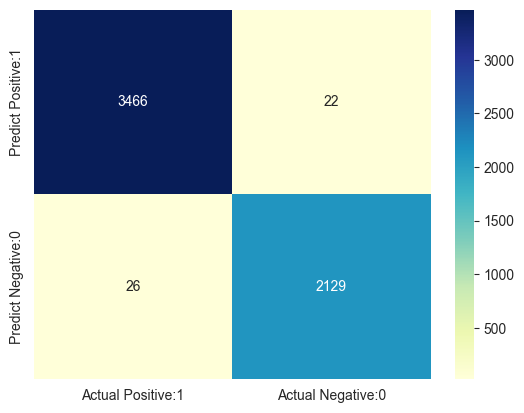

In [14]:
# Visualize confusion matrix with seaborn heatmap
%matplotlib inline

cm_matrix_kth = pd.DataFrame(data=cm_kth, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix_kth, annot=True, fmt='d', cmap='YlGnBu')

In [15]:
# Calculate the probability
y_pred_prob_kth = model_kth.predict_proba(Xkth_transform)[0:10]

y_pred_prob_kth

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.]])

In [16]:
# Store the probabilities in dataframe

y_pred_prob_df_kth = pd.DataFrame(data=y_pred_prob_kth, columns=['Toxic', 'Non-Toxic'])

y_pred_prob_df_kth

,Toxic,Non-Toxic
0,1.0,0.0
1,1.0,0.0
2,0.0,1.0
3,1.0,0.0
4,1.0,0.0
5,1.0,0.0
6,1.0,0.0
7,0.0,1.0
8,1.0,0.0
9,1.0,0.0


In [17]:
# Store the predicted probabilities for class 1 - Non-Toxic
y_pred1_kth = model_kth.predict_proba(Xkth_transform)[:, 1]

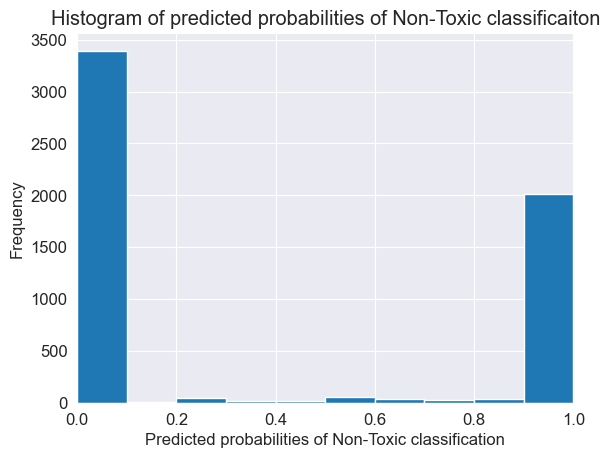

In [20]:
# Plot histogram of predicted probabilities
%matplotlib inline

plt.rcParams['font.size'] = 12

plt.hist(y_pred1_kth, bins = 10)

plt.title('Histogram of predicted probabilities of Non-Toxic classificaiton')

plt.xlim(0,1)

# set the title
plt.xlabel('Predicted probabilities of Non-Toxic classification')
plt.ylabel('Frequency')

plt.show()

At 99.15% accuracy we are slightly worse than Naive bayes.  At approximately 1 out of 100 mushrooms being misclassified, it would be a mistake to rely on this method to create our stew.

#### D. Support Vector Machine

Support Vector Machine is a model applied to datasets for classification purposes. This algorithm also analyzes datasets for regression analysis. This dataset will apply the classification approach to determine the species of the mushroom based on the attributes. For our assignment purposes we may discover trends within or amongst species as it pertains to color, taste, smell, toxicity, etc. These trends, based on species, may allow us to more readily determine mushrooms to include in or exclude from our stew recipe.

In [21]:
# Copying the dataframe to apply this classfication technique
support_df = df.copy(deep=True)
Xsvm = support_df.loc[:, knn_df.columns != 'Toxicity']
ysvm = support_df['Toxicity'].to_frame()
Encoder_x = LabelEncoder()
Encoder_y=LabelEncoder()

for col in Xsvm.columns:
    Xsvm[col] = Encoder_x.fit_transform(Xsvm[col])
ysvm = Encoder_y.fit_transform(ysvm)


Xsvm_transform = s.fit_transform(Xsvm)

c_svc = np.linspace(-5, 5, 11)
c_svc = [10**i for i in c_svc]

# Does a grid search over all parameter values and refits entire dataset using best parameters
# https://www.kaggle.com/code/samuellwl/mushroom-classifier
kf = KFold(n_splits=10, shuffle=True, random_state=10)
parameterssvc = {'clf__C':c_svc}
pipesvc = Pipeline([('scale', StandardScaler()), ('clf', SVC(random_state=10, kernel='linear', probability=True))])
model_svm = GridSearchCV(pipesvc, parameterssvc, cv=kf)
model_svm.fit(Xsvm_transform,ysvm)
ysvm_pred = model_svm.predict(Xsvm_transform)
ysvm_pred


/var/folders/9c/4dqq7j1172vgtyh4dc90x5ww0000gn/T/ipykernel_66918/882805970.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xsvm[col] = Encoder_x.fit_transform(Xsvm[col])
/Users/matthewlueck/COMP4431/COMP4431/Assignment3/venv/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 0, 1, ..., 0, 1, 1])

In [22]:
# Evaluate label (subsets) accuracy:
print(accuracy_score(ysvm, ysvm_pred))

1.0


In [23]:
# Classification error
cm_svm = confusion_matrix(ysvm, ysvm_pred)

TP_svm = cm_svm[0,0]
TN_svm = cm_svm[1,1]
FP_svm = cm_svm[0,1]
FN_svm = cm_svm[1,0]

classification_error_svm = (FP_svm + FN_svm) / float(TP_svm + TN_svm + FP_svm + FN_svm)

print('Classification error : {0:0.4f}'.format(classification_error_svm))

Classification error : 0.0000


In [24]:
# Classification precision
precision_svm = TP_svm / float(TP_svm + FP_svm)

print('Precision : {0:0.4f}'.format(precision_svm))

Precision : 1.0000


In [25]:
# Classification recall
recall_svm = TP_svm / float(TP_svm + FN_svm)

print('Recall or Sensitivity : {0:0.4f}'.format(recall_svm))

Recall or Sensitivity : 1.0000


In [26]:
# Confusion matrix

print('Confusion matrix\n\n', cm_svm)

print('\nTrue Positives(TP) = ', cm_svm[0,0])

print('\nTrue Negatives(TN) = ', cm_svm[1,1])

print('\nFalse Positives(FP) = ', cm_svm[0,1])

print('\nFalse Negatives(FN) = ', cm_svm[1,0])

Confusion matrix

 [[3488    0]
 [   0 2155]]

True Positives(TP) =  3488

True Negatives(TN) =  2155

False Positives(FP) =  0

False Negatives(FN) =  0


<AxesSubplot: >

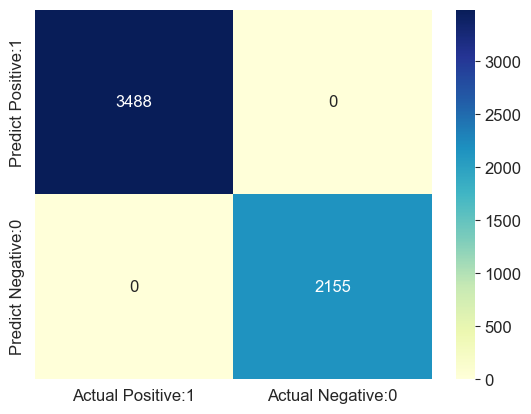

In [27]:
# Visualize confusion matrix with seaborn heatmap
%matplotlib inline

cm_matrix_svm = pd.DataFrame(data=cm_svm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix_svm, annot=True, fmt='d', cmap='YlGnBu')

In [28]:
# Calculate the probability
y_pred_prob_svm = model_svm.predict_proba(Xsvm_transform)[0:10]

y_pred_prob_svm

array([[9.99806147e-01, 1.93852525e-04],
       [9.99996489e-01, 3.51093284e-06],
       [9.13642313e-07, 9.99999086e-01],
       [9.99999900e-01, 1.00000010e-07],
       [9.89286024e-01, 1.07139764e-02],
       [9.89281912e-01, 1.07180880e-02],
       [9.99996493e-01, 3.50740095e-06],
       [9.15208269e-07, 9.99999085e-01],
       [9.89291907e-01, 1.07080933e-02],
       [9.99996490e-01, 3.50970032e-06]])

In [29]:
# Store the probabilities in dataframe

y_pred_prob_df_svm = pd.DataFrame(data=y_pred_prob_svm, columns=['Toxic', 'Non-Toxic'])

y_pred_prob_df_svm

,Toxic,Non-Toxic
0,9.998061e-01,1.938525e-04
1,9.999965e-01,3.510933e-06
2,9.136423e-07,9.999991e-01
3,9.999999e-01,1.000000e-07
4,9.892860e-01,1.071398e-02
5,9.892819e-01,1.071809e-02
6,9.999965e-01,3.507401e-06
7,9.152083e-07,9.999991e-01
8,9.892919e-01,1.070809e-02
9,9.999965e-01,3.509700e-06


In [30]:
# Store the predicted probabilities for class 1 - Non-Toxic
y_pred1_svm = model_svm.predict_proba(Xsvm_transform)[:, 1]

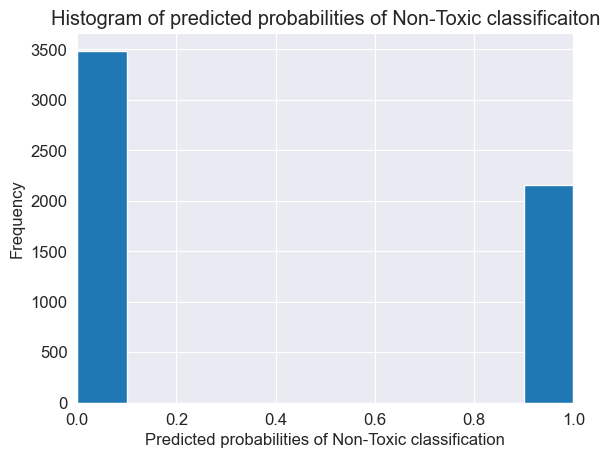

In [31]:
# Plot histogram of predicted probabilities
%matplotlib inline

plt.rcParams['font.size'] = 12

plt.hist(y_pred1_svm, bins = 10)

plt.title('Histogram of predicted probabilities of Non-Toxic classificaiton')

plt.xlim(0,1)

# set the title
plt.xlabel('Predicted probabilities of Non-Toxic classification')
plt.ylabel('Frequency')

plt.show()

Having tuned parameters for the Support Vector Machine classifier, this method is able to hit the 100% accuracy needed to create a stew that won't result in injury, death or a lawsuit.

#### E. Linear Discriminant Analysis
Linear Discriminant Analysis estimates the probability of classification into each class given a net new set of (data point) inputs. LDA maximizes the distance between the means of each class when projecting the data in a lower-dimensional space, which can lead to better classification results (thanks to the reduced overlap between the different classes). For our purposes this algorithm will provide an interesting insight into the dataset and any present class trends. But, it may not prove crucial to complete the assignment at hand (beyond a classification probability exploration).

Accuracy is: 95.4%


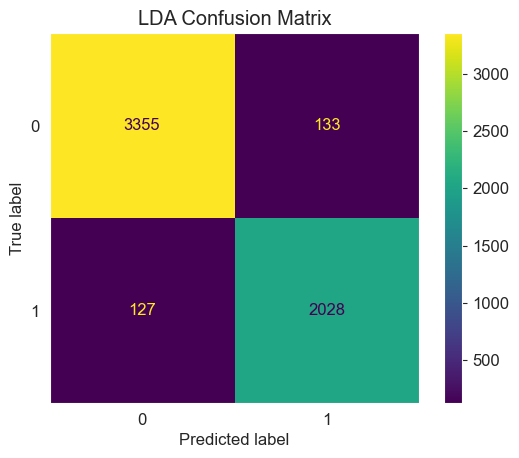

In [33]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

# per https://www.milindsoorya.com/blog/mushroom-dataset-analysis-and-classification-python
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
for column in mushrooms_df.columns:
    mushrooms_df[column] = labelencoder.fit_transform(mushrooms_df[column])

mushrooms_df.head()

cols = ['Toxicity', 'Cap Shape', 'Cap Surface', 'Cap Color', 'Bruises', 'Odor', 'Gill Attachment', 'Gill Spacing',
        'Gill Size', 'Gill Color', 'Stalk Shape', 'Stalk Root', 'Stalk Surface Above Ring', 'Stalk Surface Below Ring',
        'Stalk Color Above Ring', 'Stalk Color Below Ring', 'Veil Type', 'Veil Color', 'Ring Number', 'Ring Type',
        'Spore Print Color', 'Population', 'Habitat']
mushrooms_df.columns = cols
mushrooms_df = mushrooms_df[mushrooms_df['Stalk Root'] != '?']

LDAmushroom_df = mushrooms_df.copy(deep=True)


X = LDAmushroom_df.drop(['Toxicity'], axis=1)
y = LDAmushroom_df['Toxicity']
lda = LinearDiscriminantAnalysis().fit(X,y)
X_lda = lda.fit_transform(X,y)
print(f'Accuracy is: {round(lda.score(X,y)*100,1)}%')
cm = confusion_matrix(y, lda.predict(X), labels=lda.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lda.classes_)
disp.plot()
plt.title('LDA Confusion Matrix')
plt.grid(False)
plt.show()


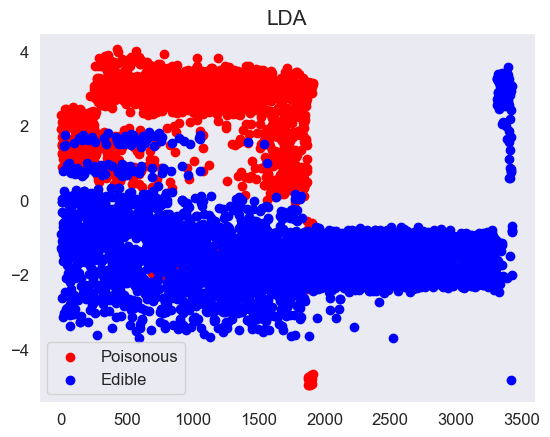

In [34]:
def plot_2D(X, Y,plot_name = ''):

    plot_df = pd.DataFrame(data = X, columns = ['C1'])
    plot_df = pd.concat([plot_df, LDAmushroom_df['Toxicity']], axis = 1)
    plot_df['Toxicity'] = LabelEncoder().fit_transform(plot_df['Toxicity'])

    plt.figure.figsize=(10,8)

    classes = [1, 0]
    colors = ['r', 'b']

    for clas, color in zip(classes, colors):

        plt.scatter(range(len(plot_df.loc[plot_df['Toxicity'] == clas, 'C1'])), plot_df.loc[plot_df['Toxicity'] == clas, 'C1'],
                c = color, alpha=1)
        plt.title(f'{plot_name}', fontsize = 15)
        plt.legend(['Poisonous', 'Edible'], loc=3, frameon=True)
        plt.grid(False)

    x1 = np.array([np.min(X[:,0], axis=0), np.max(X[:,0], axis=0)])

    plt.show()

plot_2D(X_lda, y, plot_name = 'LDA')

We reduced our dataset to just one feature with high accuracy. There appears to be some overlapping , so choosing a non-linear classifier is likely to achieve better classification.

#### F. Decision Tree
A decision tree is used when we want to identify a class for (or classify) data points (values) as a node or branch within a tree. Within this dataset, we are targeting the species of the mushroom based on the values for each attribute.

Accuracy is: 100.0%


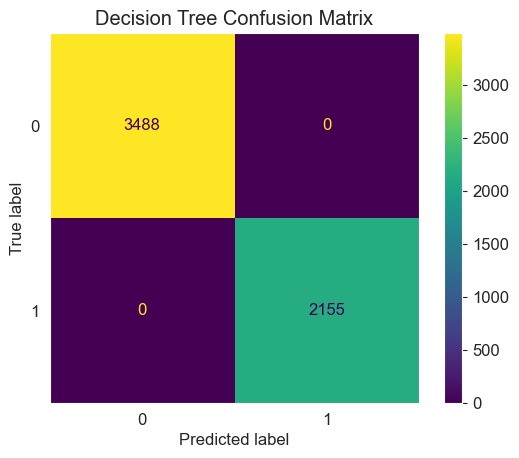

In [35]:
from sklearn.tree import DecisionTreeClassifier

DTmushroom_df = mushrooms_df.copy(deep=True)

X = DTmushroom_df.drop(['Toxicity'], axis=1).values
y = DTmushroom_df['Toxicity'].values

dt = DecisionTreeClassifier().fit(X,y)
print(f'Accuracy is: {round(dt.score(X, y)*100,1)}%')
cm = confusion_matrix(y, dt.predict(X), labels=dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)
disp.plot()
plt.title('Decision Tree Confusion Matrix')
plt.grid(False)
plt.show()

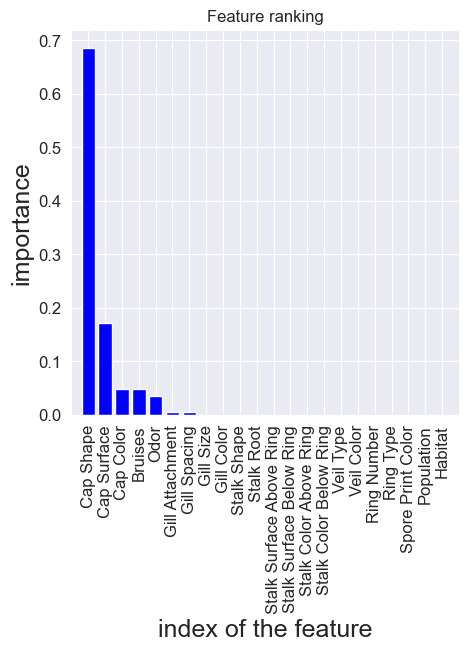

In [36]:
importances = dt.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = DTmushroom_df.drop(['Toxicity'], axis=1).columns

f, ax = plt.subplots(figsize=(5,5))
plt.title("Feature ranking", fontsize = 12)
plt.bar(range(X.shape[1]), importances[indices],
    color="b",
    align="center")
plt.xticks(range(X.shape[1]), feature_names, rotation='vertical')
plt.xlim([-1, X.shape[1]])
plt.ylabel("importance", fontsize = 18)
plt.xlabel("index of the feature", fontsize = 18)
plt.show()

According to feature importance, cap shape, cap surface, bruises, and cap color, are the most significant features.

#### G. Random Forest
Random Forest is a method used for classification and regression (output specific) that uses decision trees. With random forest, we will be able to explore the relationship (and trends) between the attributes and the given values and the species node/branch. This may inform us of species that lean towards a specific taste, smell, color, etc. which we can then explore further for confirmation.

/Users/matthewlueck/COMP4431/COMP4431/Assignment3/venv/lib/python3.9/site-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


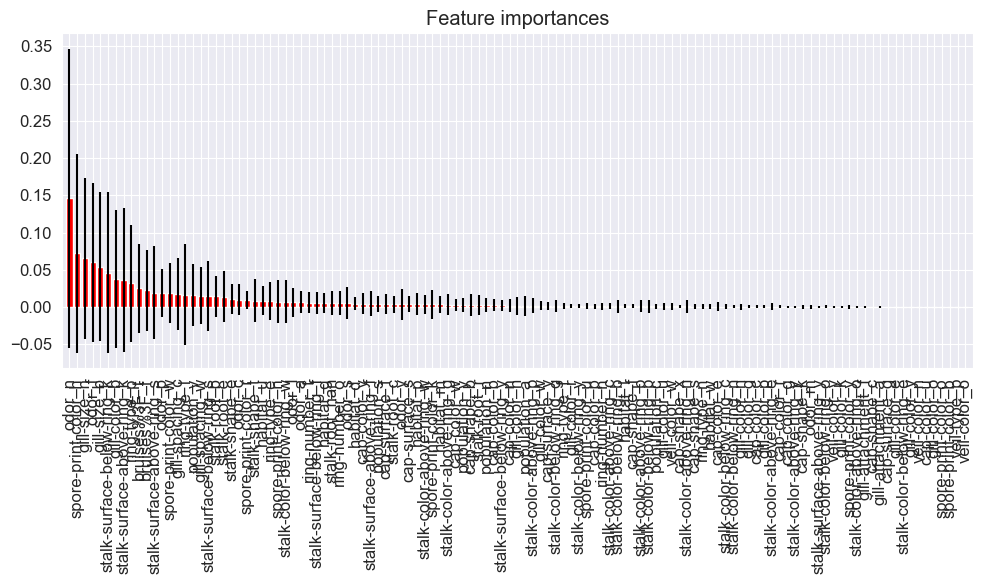

In [42]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
import numpy as np

# Load the mushroom dataset
url_file = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
data = fetch_openml(data_id = 24, as_frame = True)

X = data.data
Y = data.target

# One-hot encode the categorical features
encoder = OneHotEncoder()
X = encoder.fit_transform(X)

# Train a random forest model with 100 trees
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(X, Y)

# Plot the feature importance of the trained model
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis = 0)
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], color = "r", yerr = std[indices], align = "center")
plt.xticks(range(X.shape[1]), encoder.get_feature_names_out()[indices], rotation = 90)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()

# Export the first decision tree of the random forest to a Graphviz format
tree = rf.estimators_[0]
export_graphviz(tree, out_file = 'tree.dot', feature_names = encoder.get_feature_names_out(), filled = True)

# # Convert the Graphviz format to an image using Graphviz
# import subprocess
# subprocess.call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png'])

# # Display the decision tree image
# from IPython.display import Image
# Image(filename='tree.png')


The accuracy of the random forest model is 1.0. A random forest model with 100 trees is trained on the encoded training set. Further, the visualization extracts a single decision tree from the forest and exports it into GraphViz format and convers to an image using GraphViz. The 'feature importances' represent each feature in the model for predicting the target variable - these are calculated based on the reduction in the impurity of the nodes of the decision trees that use the feature during the construction of the forest. As a result of these techniques, the decision tree image is displayed.**

#### H. Stochastic Gradient Descent Algorithm
Stochastic Gradient Descent is an algorithm that learns linear classifiers under the convex loss function.

/Users/matthewlueck/COMP4431/COMP4431/Assignment3/venv/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/Users/matthewlueck/COMP4431/COMP4431/Assignment3/venv/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/Users/matthewlueck/COMP4431/COMP4431/Assignment3/venv/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/Users/matthewlueck/COMP4431/COMP4431/Assignment3/venv/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The lo

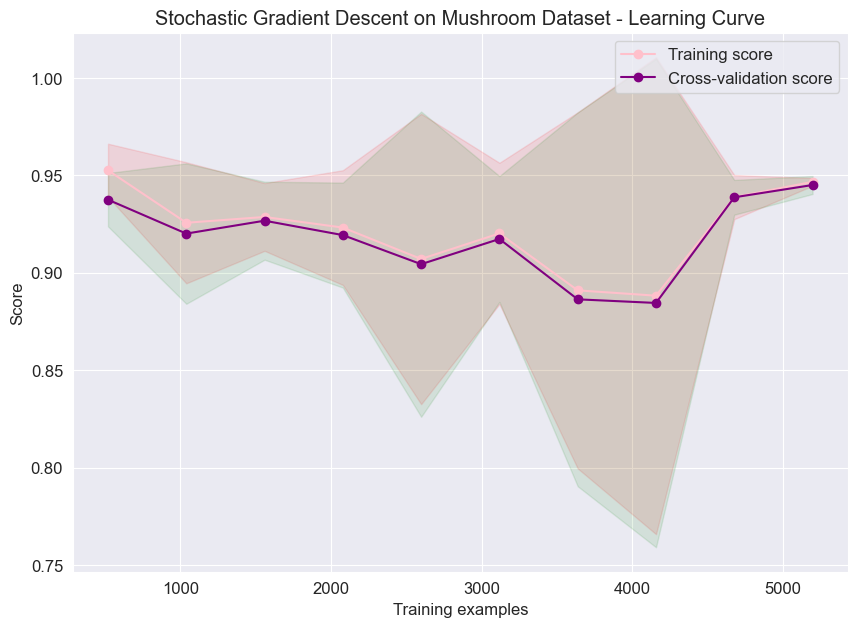

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Loading the data
url_file = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
data = pd.read_csv(url_file, header = None)

# Converting the class labels to binary values (0 or 1)
data[0] = np.where(data[0] == 'p', 1, 0)

# Encoding categorical features using LabelEncoder
label_encoders = []
for i in range(1, len(data.columns)):
    le = LabelEncoder()
    le.fit(data[i])
    data[i] = le.transform(data[i])
    label_encoders.append(le)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, 1:], data.iloc[:, 0], test_size = 0.2, random_state = 42)

# Initialize the SGDClassifier with the log loss function
sgd = SGDClassifier(loss='log')

# Calculating the learning curve
train_sizes, train_scores, test_scores = learning_curve(estimator=sgd, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv = 5)

# Calculating the mean and standard deviation of the training and testing scores
train_scores_mean = np.mean(train_scores, axis = 1)
train_scores_std = np.std(train_scores, axis = 1)
test_scores_mean = np.mean(test_scores, axis = 1)
test_scores_std = np.std(test_scores, axis = 1)

# Plotting the learning curve
plt.figure(figsize=(10, 7))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha = 0.1, color = "r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha = 0.1, color = "g")
plt.plot(train_sizes, train_scores_mean, 'o-', color = "pink", label = "Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color = "purple", label = "Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Stochastic Gradient Descent on Mushroom Dataset - Learning Curve")
plt.legend(loc = "best")
plt.show()


The above code outputs the learning curve for the SGDClassifier on the mushroom dataset. We start by loading in the dataset from the URL, convert the class labels to binary values, split the dataset into training and testing sets, performs feature selecting using chi-squared test, and then trains the model using Stochastic Gradient Descent. The learning curve shows the change in accuracy of the model over a number of iterations of the Stochastic Gradient Descent.

## Conclusion -

## Analysis of results:
The critical filtering of mushrooms, as a first step, is the removal of all poisonous ones from the set of candidates for the stew. Once the set has been successfully reduced to edible mushrooms via the chosen classification techniques a variety of factors were chosen to meet the criteria of visually appealing, pleasant smelling and delicious. Though the factors are somewhat subjective, justifications were made for each and then selected via Logistic Regression, Naïve Bayes, K, Support Vector Machine, Linear Discriminant Analysis, Decision Tree, Random Forest, and Stochastic Gradient Descent Algorithm. Finally, discussion of which techniques succeed and which are less suitable for the goals are discussed. 